<h1>IBM Applied Data Science Capstone Project</h1>

Jason Wise<br>
IBM Data Science Professional Certificate Specialization Capstone Project

<h2>Best Locations for a Gourmet Coffee Shop in Apex, NC, USA</h2>

<h3>Description of the problem and background.</h3>

<p>My hometown of Apex is a growing suburb located outside of Raleigh, NC. It's population is around 60,000. While it has many of the amenities that are attractive for suburban residents, it seems to be lacking in access to high quality coffee shops. There are plenty of places to grab an average beverage, but few establishments that cater to gourmet coffee connoisseurs.</p>

<p>The market for coffee drinkers is strong. Approximately 63% of Americans are coffee drinkers. Of those consumers, around 61% consume “gourmet” coffee (1). Additionally, around 36% of the population consumes coffee brewed outside of the home (2). In general, these statistics have an upward trend (3).</p>

<p>For this project, I am working with a fictional entrepreneur that wishes to open a Gourmet Coffee Shop in Apex, NC. While they have strong knowledge of the coffee shop market and some hunches about the best locale, they wish to base their business decision on more than just intuition. They have hired me to perform a data based analysis to determine a list of the top 5 locations for a Gourmet Coffee Shop in Apex.</p>

<p>
<ol type="1">
   <li>https://www.washingtonpost.com/news/voraciously/wp/2019/03/28/americas-growing-affection-for-gourmet-coffee-and-other-takeaways-from-a-new-national-survey/ </li>
    <li>https://dailycoffeenews.com/2018/03/21/current-coffee-consumer-trends-inside-the-ncas-2018-report/ </li>
    <li>https://arctoscoffee.com/coffee-trends-show-increase-in-gourmet-and-youth-consumption/ </li>
</ol>
</p>

<h3>Data Description</h3>

<p>Based on my analysis, I have chosen to acquire neighborhood and related demographic data for around 70 neighborhoods in Apex, NC that will be used as features within my model. My project plan is to:</p>

<ul>
    <li>Define the problem and the data required for a solution</li>
    <li>Acquire the needed data and perform analysis</li>
    <li>Explore the makeup of Apex, NC neighborhoods</li>
    <li>Analyze each Neighborhood</li>
    <li>Cluster Neighborhoods using k-means clustering</li>
    <li>Examine Clusters for client recommendations</li>
</ul>
    
<p>The following data sources will be used to perform a data based analysis to determine the best locations for a Gourmet Coffee Shop located in Apex, NC.</p>

<p><u>List of Apex, NC Subdivisions and Related Property Sales Figures</u><br>
http://trianglearearealty.com/apex-nc-subdivisions/ <br>
I will scrape this website to pull the approximately 70 different neighborhoods and their associated average sales price of homes. This data will be used to segment Apex neighborhoods according to subdivision. Additionally, average home sales prices by neighborhood will represent a demographic feature that will contribute to our analysis.</p>

<p><u>GPS Coordinates for Apex, NC Subdivisions - Google Maps Apex, NC</u><br>
https://www.google.com/maps/place/Apex,+NC/@35.7275871,-78.8999849,13z/data=!3m1!4b1!4m5!3m4!1s0x89ac92a3c19280d1:0x85cd817e17e28015!8m2!3d35.732652!4d-78.8502856 <br>
I was not able to readily find this data in a form that could be imported. I decided to manually compile the latitude and longitude values for all Apex neighborhoods via Google Maps and add them to a CSV file that will be imported to a dataframe and merged to the list of subdivisions. The GPS coordinates will allow for data visualization and k-means clustering according to related features.</p>

<p><u>Subdivision Demographic Information</u><br>
http://www.city-data.com/nbmaps/neigh-Apex-North-Carolina.html<br>
Also for this category, I was not able to readily find this data in a form that could be imported. I decided to manually compile Median Household Income, Population and Median Resident Age and store them to the CSV file of Apex neighborhoods that will be imported into the notebook. While this data is visualized and made available on the City-Data website, it is sourced from the United States Census data. This demographic data will be aligned to the list of neighborhoods and used as features in our model to determine the best location for a coffee shop.</p>

<p><u>Foursquare Venues and Categories</u><br>
I will utilize the Foursquare Places API to conduct a comparison of neighborhoods that may support a coffee shop. I will look at complimentary businesses in the area as well as competing businesses.</p>

<h3>Methodology</h3>

These are the libraries that we'll be using in our analysis. 

In [2]:
#!pip install folium

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import folium
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import json 
import requests

Let's start by importing our list of Apex subdivisions. We will acquire this data by scraping from a local realtor's webiste. We'll also grab average home sales price by subdivision, which will represent one of our demographic features. This data will be captured to a dataframe.

In [4]:
#Import List of Apex subdivisions
url = 'http://trianglearearealty.com/apex-nc-subdivisions/'
tables = pd.read_html(url)

print(len(tables))
print(tables[1])

2
                               0         1
0               GreyHawk Landing  $740,000
1              Churchill Estates  $588,000
2                       Branston  $563,000
3          Village of Wynchester  $533,000
4                       Villagio  $522,000
..                           ...       ...
64                  Sunset Hills  $170,000
65                Homestead Park  $162,000
66                Carriage Downs  $161,000
67               Bradley Terrace  $143,000
68  Scotts Mill at Bungalow Park  $143,000

[69 rows x 2 columns]


In [5]:
#extract table to a df
subd = tables[1]
subd.rename(columns={0: "Neighborhood", 1: "AvgHomeSalesPrice"}, inplace="true")
print(subd.shape)
subd.head(2)

(69, 2)


,Neighborhood,AvgHomeSalesPrice
0,GreyHawk Landing,"$740,000"
1,Churchill Estates,"$588,000"


The data was acquired as expected. Let's bring in more data that we'll be used. This data was acquired manually from Google Maps and City-Data. It's not my preferred way to capture data, but there wasn't data readily available in a downloadable format that met our needs. This data is in a CSV file and includes latitude, longitude, median household income, population, median resident age, as well as the URL for where the US Census data was grabbed from the City-Data site. After importing the CSV, we'll convert it to a dataframe for easy management. 

In [6]:
#import addtl data to a new df
demo = pd.read_csv('apex-demographic.csv')
print(demo.shape)
demo.head(2)

(69, 7)


,Neighborhood,Latitude,Longitude,Median Household Income,Population,Median Resident Age,Demographics Source
0,Newbury Park,35.681031,-78.809368,85809,5105,33.9,http://www.city-data.com/neighborhood/Newbury-...
1,Woodcreek,35.669081,-78.810607,85809,5105,33.9,http://www.city-data.com/neighborhood/Woodcree...


Now that we have our two dataframes, let's merge them to one dataframe using the Neighborhood column as our common index.

In [7]:
#merge the two DFs
subd_demo = pd.merge(
    subd,
    demo,
    how="inner",
    on='Neighborhood'
)
print(subd_demo.shape)
subd_demo.head(2)

(69, 8)


,Neighborhood,AvgHomeSalesPrice,Latitude,Longitude,Median Household Income,Population,Median Resident Age,Demographics Source
0,GreyHawk Landing,"$740,000",35.704338,-78.779256,158095,2032,50.6,http://www.city-data.com/neighborhood/Greyhawk...
1,Churchill Estates,"$588,000",35.692623,-78.768043,135431,4847,39.9,http://www.city-data.com/neighborhood/Churchil...


The data merged together nicely, now we need to clean it up a little bit for our usage. Also, we're going to drop the population field as it seems that the borders of the US Census Data don't align very well with our subdivisions for this to be used. This means that it won't be very reliable as a feature for our analysis.

In [8]:
#clean the data
#drop data not needed - population census shape does not align well with subdivision shape
subd_demo.drop(columns=['Demographics Source','Population'], inplace=True) 
subd_demo['AvgHomeSalesPrice'] = subd_demo['AvgHomeSalesPrice'].str.replace(r'$', '').str.replace(r',', '').astype('int64')
print(subd_demo.shape)
print(subd_demo.dtypes)
subd_demo.head(2)

(69, 6)
Neighborhood                object
AvgHomeSalesPrice            int64
Latitude                   float64
Longitude                  float64
Median Household Income      int64
Median Resident Age        float64
dtype: object


,Neighborhood,AvgHomeSalesPrice,Latitude,Longitude,Median Household Income,Median Resident Age
0,GreyHawk Landing,740000,35.704338,-78.779256,158095,50.6
1,Churchill Estates,588000,35.692623,-78.768043,135431,39.9


Next, we want to visualize all of our neighborhoods on a map using Folium. We'll use just the data that we need for mapping.

In [9]:
#filter our data to plot the neighborhoods on a map
apex_neigh_ll = subd_demo[['Neighborhood','Latitude','Longitude']]
#print(apex_neigh_ll.shape)
#apex_neigh_ll.head()

In [10]:
#visualize the neighborhoods on a map
latitude = 35.7327
longitude = -78.8503
map_apex = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(apex_neigh_ll['Latitude'], apex_neigh_ll['Longitude'], apex_neigh_ll['Neighborhood']):
    label = '{}, {}'.format(neighborhood, "Apex, NC")
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_apex)  
    
map_apex

All of our neigbors presented nicely and as expected on the map. Now you can see each Apex subdivision (neighborhood) across the town. Next, we want to do some analysis of the demographic data and get some descriptive statistics to help guide us for next steps.

In [11]:
#examine neighborhood demographics
neigh_demos = subd_demo[['Neighborhood', 'AvgHomeSalesPrice','Median Household Income', 'Median Resident Age']]
neigh_demos.head(2)

,Neighborhood,AvgHomeSalesPrice,Median Household Income,Median Resident Age
0,GreyHawk Landing,740000,158095,50.6
1,Churchill Estates,588000,135431,39.9


In [12]:
neigh_demos.describe()

,AvgHomeSalesPrice,Median Household Income,Median Resident Age
count,69.000000,69.000000,69.000000
mean,311637.681159,116370.405797,38.742029
std,113934.704083,20027.744811,3.826548
min,143000.000000,70268.000000,33.900000
25%,233000.000000,100345.000000,36.100000
50%,282000.000000,118780.000000,37.200000
75%,369000.000000,128636.000000,39.900000
max,740000.000000,158095.000000,50.600000


The data here has some neighborhoods that are really outside of the target demographic. Let's filter that out so that we can focus more on those neighborhoods that represent potential customers. We'll filter out those neighborhoods with a median resident age over 40 and those with median household income over the median household income calculated from data set for all Apex neighborhoods. We'll sort the data and move the columns around to make them easier to digest.

In [13]:
#reduce the dataset to our target market consumers
targeted_neigh_demos = neigh_demos

#Median Resident Age < 40
delAges = targeted_neigh_demos[(targeted_neigh_demos['Median Resident Age'] > 40)].index
targeted_neigh_demos.drop(delAges, inplace=True)

#set our desired mean income range point from the original demographics
#mean_inc = neigh_demos['Median Household Income'].mean()
mean_inc = 116370.41

#Median Household Income above mean
delIncomes = targeted_neigh_demos[(targeted_neigh_demos['Median Household Income'] < mean_inc)].index
targeted_neigh_demos.drop(delIncomes, inplace=True)

#Sort by Median Resident Age, and Highest Complimentary Score
targeted_neigh_demos.sort_values(['Median Resident Age','Median Household Income'],ascending=(True,False), inplace=True)

# move columns to align with sort priority
col_name = "Median Resident Age"
second_col = targeted_neigh_demos.pop(col_name)
targeted_neigh_demos.insert(1,col_name, second_col)

col_name = "Median Household Income"
third_col = targeted_neigh_demos.pop(col_name)
targeted_neigh_demos.insert(2,col_name, third_col)

targeted_neigh_demos.reset_index(inplace = True, drop = True) 

targeted_neigh_demos

C:\Users\jason\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-13-dbfcbf6e63ff>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targeted_neigh_demos.sort_values(['Median Resident Age','Median Household Income'],ascending=(True,False), inplace=True)


,Neighborhood,Median Resident Age,Median Household Income,AvgHomeSalesPrice
0,Covington,35.8,118780,378000
1,The Park At West Lake,35.8,118780,350000
2,Sawyers Mill,35.8,118780,228000
3,Villagio,36.1,128636,522000
4,Bella Casa,36.1,128636,490000
5,Holland Farm,36.1,128636,387000
6,Crocketts Ridge,36.1,128636,275000
7,Kelly West,36.1,128636,243000
8,Greenbrier,36.1,128636,223000
9,Hollands Crossing,36.1,128636,218000


Now that we have a more targeted dataset, we would like to visualize what we are now working with in terms of our base demographic market. Let's add our latitude and longitude back in and map with Folium.

In [14]:
#add the lat, long back in for mapping
targeted_neigh_demos_ll = pd.merge(
    targeted_neigh_demos,
    apex_neigh_ll,
    how="inner",
    on='Neighborhood'
)
#targeted_neigh_demos_ll

#map the new neighborhoods to determine if there are locations that are too far out
latitude = 35.7327
longitude = -78.8503
map_apex_targeted = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(targeted_neigh_demos_ll['Latitude'], targeted_neigh_demos_ll['Longitude'], targeted_neigh_demos_ll['Neighborhood']):
    label = '{}, {}'.format(neighborhood, "Apex, NC")
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_apex_targeted)  
    
map_apex_targeted

That looks like a decent set of neigborhoods to analyze. Now, we want to pull in the Venue data from the Foursquare Places API in JSON format. We'll set our venue limit to 100 per neighborhood and capture all venues within 1.7 miles of each neighborhood. The JSON data will be transformed to a dataframe.

In [15]:
#Removed Foursquare credentials for publishing
#Foursquare
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '' # Foursquare API version
LIMIT = 100

In [16]:
#Grab a list of all nearby venues for each targeted neighborhood
def getNearbyVenues(names, latitudes, longitudes, radius=2750):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
apex_venues = getNearbyVenues(names=targeted_neigh_demos_ll['Neighborhood'], latitudes=targeted_neigh_demos_ll['Latitude'], longitudes=targeted_neigh_demos_ll['Longitude'])
apex_venues.to_csv('apex_venues.csv')
print(apex_venues.shape)
apex_venues.head(2)

Covington
The Park At West Lake
Sawyers Mill
Villagio
Bella Casa
Holland Farm
Crocketts Ridge
Kelly West
Greenbrier
Hollands Crossing
Abbington
Woodridge
Homestead Park
Beckett Crossing
Olive Chapel Park
Walden Creek
Walden Townes
Carriage Downs
Charleston Village
Churchill Estates
Jamison Park
The Park at Langston
Langston
West Lake
Belmont
(1014, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Covington,35.665071,-78.749281,Middle Creek Disc Golf Course,35.665374,-78.763891,Disc Golf
1,Covington,35.665071,-78.749281,Middle Creek Park,35.665426,-78.764891,Soccer Field


We captured quite a few venues from the API. As each venue category will essentially become a feature in our analysis, we want to filter this list out to only those venue categories that are important to our analysis. We separate them by Complimentary Businesses (those that would be good for a coffee shop to be close to) and those that are direct competitors.

In [18]:
#venue categories that we want to include in our analysis
complim_bus = ['Fast Food Restaurant','Gas Station','Convenience Store','Sandwich Place',
              'Deli / Bodega','Food Court','Nail Salon','Spa','Bookstore','Gym / Fitness Center',
               'Salon / Barbershop','Flower Shop','Furniture / Home Store','Gym','Shipping Store',
               'Bookstore','Gymnastics Gym','Theater','Boutique']
compet_bus = ['Coffee Shop','Café']
filt_bus = complim_bus + compet_bus

#limit to categories that are part of our analysis
apex_filtered_venues = apex_venues[apex_venues['Venue Category'].isin(filt_bus)]
print(apex_filtered_venues.shape)
apex_filtered_venues.to_csv('apex_filtered_venues.csv')
apex_filtered_venues.head(2)

(209, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
5,Covington,35.665071,-78.749281,Dayspring Flowers,35.682560,-78.751175,Flower Shop
32,Villagio,35.725991,-78.906460,Culver's,35.737141,-78.895332,Fast Food Restaurant


Now that we have a filtered dataset of venues that we care about, we need to break this categorical data out into numeric fields so that we can utilize in during our analysis. We'll use the get_dummies function to break each category into a new column where 1 designates an occurrence of a venue in the category. Zero will indicate that lack of presence of that type of venue in that neighborhood's radius.

In [19]:
#Analyze each neigborhood - Break out features
# one hot encoding
apex_onehot = pd.get_dummies(apex_filtered_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
apex_onehot['Neighborhood'] = apex_filtered_venues['Neighborhood'] 

# move neighborhood column to the first column
col_name = "Neighborhood"
first_col = apex_onehot.pop(col_name)
apex_onehot.insert(0,col_name, first_col)

apex_onehot.head(2)
#apex_onehot.to_csv('apex_onehot.csv')

,Neighborhood,Bookstore,Coffee Shop,Convenience Store,Fast Food Restaurant,Flower Shop,Furniture / Home Store,Gas Station,Gym,Gym / Fitness Center,Gymnastics Gym,Salon / Barbershop,Sandwich Place,Shipping Store,Spa,Theater
5,Covington,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
32,Villagio,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


We now have a lot of individual venues listed according to one hot encoding. To make this useful, we need to aggregate them in a couple of different ways so as to analyze and use the data. We'll first break them out my the mean occurrence (frequency) for each neighborhood. We also want to prepare another dataframe that groups our data by the sum of venues for a specific category in a neighborhood.

In [20]:
#prepare data to determine top venues by neighborhood - frequency
apex_grouped = apex_onehot.groupby('Neighborhood').mean().reset_index()
apex_grouped.to_csv('apex_grouped.csv')

#prepare data to determine top venues by neighborhood - counts of each business category 
apex_grouped_counts = apex_onehot.groupby('Neighborhood').sum().reset_index()

Next, we want to determine the top 10 venue categories for each of our neighborhoods to give us an idea of their makeup.

In [21]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [22]:
#top venues by neighborhood 
#when re running k means, need to regenerate to drop venue labels from df
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = apex_grouped['Neighborhood']

for ind in np.arange(apex_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(apex_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.to_csv('neighborhoods_venues_sorted.csv')
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbington,Coffee Shop,Furniture / Home Store,Sandwich Place,Salon / Barbershop,Fast Food Restaurant,Theater,Spa,Shipping Store,Gymnastics Gym,Gym
1,Beckett Crossing,Coffee Shop,Sandwich Place,Furniture / Home Store,Salon / Barbershop,Gas Station,Fast Food Restaurant,Theater,Spa,Shipping Store,Gymnastics Gym
2,Belmont,Convenience Store,Theater,Spa,Shipping Store,Sandwich Place,Salon / Barbershop,Gymnastics Gym,Gym / Fitness Center,Gym,Gas Station
3,Carriage Downs,Coffee Shop,Furniture / Home Store,Sandwich Place,Salon / Barbershop,Gas Station,Fast Food Restaurant,Theater,Spa,Shipping Store,Gymnastics Gym
4,Charleston Village,Sandwich Place,Salon / Barbershop,Coffee Shop,Furniture / Home Store,Spa,Gym,Fast Food Restaurant,Shipping Store,Gymnastics Gym,Convenience Store


Now we want to add our demographic data back in so that we can see the whole picture of all features.

In [23]:
neighborhoods_venues_sorted = pd.merge(
    neighborhoods_venues_sorted,
    targeted_neigh_demos_ll,
    how="inner",
    on='Neighborhood'
)

#remove lat long
neighborhoods_venues_sorted.drop(columns=['Latitude','Longitude'], inplace=True) 
print(neighborhoods_venues_sorted.shape)

neighborhoods_venues_sorted.head(2)

(21, 14)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Median Resident Age,Median Household Income,AvgHomeSalesPrice
0,Abbington,Coffee Shop,Furniture / Home Store,Sandwich Place,Salon / Barbershop,Fast Food Restaurant,Theater,Spa,Shipping Store,Gymnastics Gym,Gym,37.0,145795,438000
1,Beckett Crossing,Coffee Shop,Sandwich Place,Furniture / Home Store,Salon / Barbershop,Gas Station,Fast Food Restaurant,Theater,Spa,Shipping Store,Gymnastics Gym,37.0,127240,353000


We'll do the same for our venue category frequency dataset.

In [24]:
apex_grouped_demo = pd.merge(
    apex_grouped,
    targeted_neigh_demos_ll,
    how="inner",
    on='Neighborhood'
)

#remove lat long
apex_grouped_demo.drop(columns=['Latitude','Longitude'], inplace=True) 
print(apex_grouped_demo.shape)
apex_grouped_demo.head(2)

(21, 19)


,Neighborhood,Bookstore,Coffee Shop,Convenience Store,Fast Food Restaurant,Flower Shop,Furniture / Home Store,Gas Station,Gym,Gym / Fitness Center,Gymnastics Gym,Salon / Barbershop,Sandwich Place,Shipping Store,Spa,Theater,Median Resident Age,Median Household Income,AvgHomeSalesPrice
0,Abbington,0.045455,0.227273,0.045455,0.090909,0.0,0.136364,0.045455,0.045455,0.0,0.045455,0.090909,0.090909,0.045455,0.045455,0.045455,37.0,145795,438000
1,Beckett Crossing,0.043478,0.173913,0.043478,0.086957,0.0,0.130435,0.086957,0.043478,0.0,0.043478,0.086957,0.130435,0.043478,0.043478,0.043478,37.0,127240,353000


Next, we want to determinal the optimal k value for our dataset based on the features that we have. We need to break the data into features with continous values only so that we can normalize the data set. We'll use our MinMaxScaler method to get standardized feature values to determine our optimal number of clusters to calculate.

In [25]:
#normalize continuous features (demographic) to determine optimal k
continuous_features = apex_grouped_demo
continuous_features.drop(columns=['Neighborhood'], inplace=True) 

mms = MinMaxScaler()
mms.fit(continuous_features)
data_transformed = mms.transform(continuous_features)
#data_transformed

In [26]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

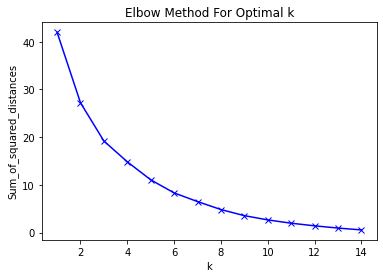

In [27]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Our optimal k value appears to be about 3. This graph is a little "rounder" than we would like. The elbow would ideally be sharper. This is likely due to our filtering the dataset already, so that the remaining values are more similar.

In [28]:
#apex_grouped_demo #somehow this is losing the neighborhood column
apex_grouped_demo = pd.merge(
    apex_grouped,
    targeted_neigh_demos_ll,
    how="inner",
    on='Neighborhood'
)

#remove lat long
apex_grouped_demo.drop(columns=['Latitude','Longitude'], inplace=True) 
print(apex_grouped_demo.shape)
apex_grouped_demo.head(2)

(21, 19)


,Neighborhood,Bookstore,Coffee Shop,Convenience Store,Fast Food Restaurant,Flower Shop,Furniture / Home Store,Gas Station,Gym,Gym / Fitness Center,Gymnastics Gym,Salon / Barbershop,Sandwich Place,Shipping Store,Spa,Theater,Median Resident Age,Median Household Income,AvgHomeSalesPrice
0,Abbington,0.045455,0.227273,0.045455,0.090909,0.0,0.136364,0.045455,0.045455,0.0,0.045455,0.090909,0.090909,0.045455,0.045455,0.045455,37.0,145795,438000
1,Beckett Crossing,0.043478,0.173913,0.043478,0.086957,0.0,0.130435,0.086957,0.043478,0.0,0.043478,0.086957,0.130435,0.043478,0.043478,0.043478,37.0,127240,353000


We'll run our k-mean analysis looking for 3 clusters of neighborhoods that will essentially give us three groups of potential customers. 

In [29]:
# set number of clusters
# to re run this, the venue labels under neighborhoods_venues_sorted need to be regenerated first
kclusters = 3

apex_grouped_clustering = apex_grouped_demo.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(apex_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:13] 

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
#neighborhoods_venues_sorted

#create a df for map visualization
apex_merged = neighborhoods_venues_sorted

#grab the lat, long values to merge into our data
neigh_ll = targeted_neigh_demos_ll
#these columns already exist in the neighborhoods_venues_sorted df, so drop before merging
neigh_ll.drop(columns=['Median Resident Age', 'Median Household Income', 'AvgHomeSalesPrice'], inplace=True) 

#merge our lat, long to the mapping df
apex_merged = pd.merge(
    apex_merged,
    neigh_ll,
    how="inner",
    on='Neighborhood'
)

#apex_merged.to_csv('apex_merged.csv')
apex_merged

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Median Resident Age,Median Household Income,AvgHomeSalesPrice,Latitude,Longitude
0,2,Abbington,Coffee Shop,Furniture / Home Store,Sandwich Place,Salon / Barbershop,Fast Food Restaurant,Theater,Spa,Shipping Store,Gymnastics Gym,Gym,37.0,145795,438000,35.741750,-78.866959
1,0,Beckett Crossing,Coffee Shop,Sandwich Place,Furniture / Home Store,Salon / Barbershop,Gas Station,Fast Food Restaurant,Theater,Spa,Shipping Store,Gymnastics Gym,37.0,127240,353000,35.740467,-78.878543
2,0,Belmont,Convenience Store,Theater,Spa,Shipping Store,Sandwich Place,Salon / Barbershop,Gymnastics Gym,Gym / Fitness Center,Gym,Gas Station,39.9,134431,386000,35.667303,-78.751513
3,1,Carriage Downs,Coffee Shop,Furniture / Home Store,Sandwich Place,Salon / Barbershop,Gas Station,Fast Food Restaurant,Theater,Spa,Shipping Store,Gymnastics Gym,37.0,127240,161000,35.741873,-78.875043
4,1,Charleston Village,Sandwich Place,Salon / Barbershop,Coffee Shop,Furniture / Home Store,Spa,Gym,Fast Food Restaurant,Shipping Store,Gymnastics Gym,Convenience Store,39.3,132386,272000,35.761022,-78.865344
5,2,Churchill Estates,Sandwich Place,Gym / Fitness Center,Gas Station,Flower Shop,Convenience Store,Coffee Shop,Theater,Spa,Shipping Store,Salon / Barbershop,39.9,135431,588000,35.692623,-78.768043
6,0,Covington,Flower Shop,Theater,Spa,Shipping Store,Sandwich Place,Salon / Barbershop,Gymnastics Gym,Gym / Fitness Center,Gym,Gas Station,35.8,118780,378000,35.665071,-78.749281
7,1,Crocketts Ridge,Gas Station,Fast Food Restaurant,Theater,Spa,Shipping Store,Sandwich Place,Salon / Barbershop,Gymnastics Gym,Gym / Fitness Center,Gym,36.1,128636,275000,35.719733,-78.895995
8,1,Greenbrier,Furniture / Home Store,Fast Food Restaurant,Spa,Sandwich Place,Salon / Barbershop,Gymnastics Gym,Gas Station,Coffee Shop,Theater,Shipping Store,36.1,128636,223000,35.730493,-78.897579
9,1,Hollands Crossing,Gas Station,Fast Food Restaurant,Theater,Spa,Shipping Store,Sandwich Place,Salon / Barbershop,Gymnastics Gym,Gym / Fitness Center,Gym,36.1,128636,218000,35.724262,-78.909642


We now have clusters numbered from 0 to 2, for a total of 3. Let's visualize our clusters to see how the groups fall onto our map of Apex.

In [30]:
# Visualize clusters with Matplotlib

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(apex_merged['Latitude'], apex_merged['Longitude'], apex_merged['Neighborhood'], apex_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='#8000ff',
        #color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Ok, that looks good. Now we need to break the clusters out separately. We'll use this a little later to do some data analysis.

In [31]:
#cluster 0
cluster_0 = apex_merged[apex_merged['Cluster Labels'] == 0]
cluster_0

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Median Resident Age,Median Household Income,AvgHomeSalesPrice,Latitude,Longitude
1,0,Beckett Crossing,Coffee Shop,Sandwich Place,Furniture / Home Store,Salon / Barbershop,Gas Station,Fast Food Restaurant,Theater,Spa,Shipping Store,Gymnastics Gym,37.0,127240,353000,35.740467,-78.878543
2,0,Belmont,Convenience Store,Theater,Spa,Shipping Store,Sandwich Place,Salon / Barbershop,Gymnastics Gym,Gym / Fitness Center,Gym,Gas Station,39.9,134431,386000,35.667303,-78.751513
6,0,Covington,Flower Shop,Theater,Spa,Shipping Store,Sandwich Place,Salon / Barbershop,Gymnastics Gym,Gym / Fitness Center,Gym,Gas Station,35.8,118780,378000,35.665071,-78.749281
13,0,Langston,Convenience Store,Theater,Spa,Shipping Store,Sandwich Place,Salon / Barbershop,Gymnastics Gym,Gym / Fitness Center,Gym,Gas Station,39.9,135431,334000,35.671539,-78.754882
14,0,Olive Chapel Park,Coffee Shop,Furniture / Home Store,Sandwich Place,Salon / Barbershop,Fast Food Restaurant,Theater,Spa,Shipping Store,Gymnastics Gym,Gym,37.0,127240,328000,35.738417,-78.873130
15,0,The Park at Langston,Flower Shop,Theater,Spa,Shipping Store,Sandwich Place,Salon / Barbershop,Gymnastics Gym,Gym / Fitness Center,Gym,Gas Station,39.9,135431,357000,35.670440,-78.750054
17,0,Walden Creek,Sandwich Place,Furniture / Home Store,Coffee Shop,Salon / Barbershop,Gas Station,Fast Food Restaurant,Spa,Shipping Store,Gymnastics Gym,Gym,37.0,127240,314000,35.753068,-78.881913
19,0,West Lake,Convenience Store,Theater,Spa,Shipping Store,Sandwich Place,Salon / Barbershop,Gymnastics Gym,Gym / Fitness Center,Gym,Gas Station,39.9,135431,287000,35.668192,-78.754453


In [32]:
#cluster 1
cluster_1 = apex_merged[apex_merged['Cluster Labels'] == 1]
cluster_1

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Median Resident Age,Median Household Income,AvgHomeSalesPrice,Latitude,Longitude
3,1,Carriage Downs,Coffee Shop,Furniture / Home Store,Sandwich Place,Salon / Barbershop,Gas Station,Fast Food Restaurant,Theater,Spa,Shipping Store,Gymnastics Gym,37.0,127240,161000,35.741873,-78.875043
4,1,Charleston Village,Sandwich Place,Salon / Barbershop,Coffee Shop,Furniture / Home Store,Spa,Gym,Fast Food Restaurant,Shipping Store,Gymnastics Gym,Convenience Store,39.3,132386,272000,35.761022,-78.865344
7,1,Crocketts Ridge,Gas Station,Fast Food Restaurant,Theater,Spa,Shipping Store,Sandwich Place,Salon / Barbershop,Gymnastics Gym,Gym / Fitness Center,Gym,36.1,128636,275000,35.719733,-78.895995
8,1,Greenbrier,Furniture / Home Store,Fast Food Restaurant,Spa,Sandwich Place,Salon / Barbershop,Gymnastics Gym,Gas Station,Coffee Shop,Theater,Shipping Store,36.1,128636,223000,35.730493,-78.897579
9,1,Hollands Crossing,Gas Station,Fast Food Restaurant,Theater,Spa,Shipping Store,Sandwich Place,Salon / Barbershop,Gymnastics Gym,Gym / Fitness Center,Gym,36.1,128636,218000,35.724262,-78.909642
10,1,Homestead Park,Furniture / Home Store,Spa,Salon / Barbershop,Gas Station,Fast Food Restaurant,Coffee Shop,Theater,Shipping Store,Sandwich Place,Gymnastics Gym,37.0,145795,162000,35.736425,-78.904923
12,1,Kelly West,Furniture / Home Store,Spa,Salon / Barbershop,Gas Station,Fast Food Restaurant,Coffee Shop,Theater,Shipping Store,Sandwich Place,Gymnastics Gym,36.1,128636,243000,35.727676,-78.899686
18,1,Walden Townes,Coffee Shop,Sandwich Place,Furniture / Home Store,Salon / Barbershop,Gas Station,Fast Food Restaurant,Spa,Shipping Store,Gymnastics Gym,Gym,37.0,127240,190000,35.751542,-78.879728
20,1,Woodridge,Furniture / Home Store,Spa,Salon / Barbershop,Gas Station,Fast Food Restaurant,Theater,Shipping Store,Sandwich Place,Gymnastics Gym,Gym / Fitness Center,37.0,145795,261000,35.732558,-78.909073


In [33]:
#cluster 2
cluster_2 = apex_merged[apex_merged['Cluster Labels'] == 2]
cluster_2

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Median Resident Age,Median Household Income,AvgHomeSalesPrice,Latitude,Longitude
0,2,Abbington,Coffee Shop,Furniture / Home Store,Sandwich Place,Salon / Barbershop,Fast Food Restaurant,Theater,Spa,Shipping Store,Gymnastics Gym,Gym,37.0,145795,438000,35.741750,-78.866959
5,2,Churchill Estates,Sandwich Place,Gym / Fitness Center,Gas Station,Flower Shop,Convenience Store,Coffee Shop,Theater,Spa,Shipping Store,Salon / Barbershop,39.9,135431,588000,35.692623,-78.768043
11,2,Jamison Park,Convenience Store,Gym / Fitness Center,Theater,Spa,Shipping Store,Sandwich Place,Salon / Barbershop,Gymnastics Gym,Gym,Gas Station,39.9,135431,490000,35.672776,-78.763401
16,2,Villagio,Furniture / Home Store,Gas Station,Fast Food Restaurant,Theater,Spa,Shipping Store,Sandwich Place,Salon / Barbershop,Gymnastics Gym,Gym / Fitness Center,36.1,128636,522000,35.725991,-78.906460


In [34]:
#break the cluster labels for each neighborhood into their own df
neigh_cluster_labels = apex_merged[['Cluster Labels','Neighborhood']]
#neigh_cluster_labels
#attach the venue counts to the cluster labels so that we can sum complimentary vs competitors
apex_cluster_counts = pd.merge(
    neigh_cluster_labels,
    apex_grouped_counts,
    how="inner",
    on='Neighborhood'
)

apex_cluster_counts

,Cluster Labels,Neighborhood,Bookstore,Coffee Shop,Convenience Store,Fast Food Restaurant,Flower Shop,Furniture / Home Store,Gas Station,Gym,Gym / Fitness Center,Gymnastics Gym,Salon / Barbershop,Sandwich Place,Shipping Store,Spa,Theater
0,2,Abbington,1,5,1,2,0,3,1,1,0,1,2,2,1,1,1
1,0,Beckett Crossing,1,4,1,2,0,3,2,1,0,1,2,3,1,1,1
2,0,Belmont,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,Carriage Downs,1,5,1,2,0,3,2,1,0,1,2,2,1,1,1
4,1,Charleston Village,0,4,1,2,0,3,0,2,0,1,4,4,1,2,0
5,2,Churchill Estates,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0
6,0,Covington,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,1,Crocketts Ridge,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
8,1,Greenbrier,0,1,0,2,0,3,1,0,0,1,1,1,0,1,0
9,1,Hollands Crossing,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


Now we want to sum up the total number of complimentary businesses and direct competitors by neighborhood. We'll also add in the ratio of competitors/complimentary for a weighted view of market saturation.

In [35]:
#describe clusters by complimentary vs competitive factors
#update feature labels to those that are present in our updated dataset
#"['Boutique', 'Deli / Bodega', 'Nail Salon', 'Food Court'] not in index"
complim_bus2 = ['Fast Food Restaurant','Gas Station','Convenience Store','Sandwich Place','Spa','Bookstore',
                'Gym / Fitness Center','Salon / Barbershop','Flower Shop','Furniture / Home Store','Gym',
                'Shipping Store','Bookstore','Gymnastics Gym','Theater']
compet_bus2 = ['Coffee Shop']

#sum the complimentary businesses vs competitors by neighborhood
complim_vs_compet = apex_cluster_counts
complim_vs_compet['Complimentary'] = complim_vs_compet[complim_bus2].sum(axis=1)
complim_vs_compet['Competitors'] = complim_vs_compet[compet_bus2].sum(axis=1) 
#complim_vs_compet
#add a ratio for the percentage of competitors vs complimentary in a neighborhood
complim_vs_compet['Ratio'] = complim_vs_compet['Competitors'] / complim_vs_compet['Complimentary']
complim_vs_compet.sort_values(['Cluster Labels','Complimentary','Competitors','Ratio'],ascending=(True,False,True,True), inplace=True)
complim_vs_compet.reset_index(inplace = True, drop = True)
complim_vs_compet[['Cluster Labels','Neighborhood','Complimentary','Competitors','Ratio']]

,Cluster Labels,Neighborhood,Complimentary,Competitors,Ratio
0,0,Beckett Crossing,20,4,0.200000
1,0,Olive Chapel Park,18,5,0.277778
2,0,Walden Creek,17,3,0.176471
3,0,Belmont,1,0,0.000000
4,0,Covington,1,0,0.000000
5,0,Langston,1,0,0.000000
6,0,The Park at Langston,1,0,0.000000
7,0,West Lake,1,0,0.000000
8,1,Charleston Village,20,4,0.200000
9,1,Carriage Downs,19,5,0.263158


That looks great. Now we want to filter the clusters out to do some descriptive analytics so that we can evaluate each customer segment and name them.

In [36]:
#clustered neighborhoods with only demographic data
neigh_clust_demos = apex_merged
neigh_clust_demos = neigh_clust_demos[['Cluster Labels','Neighborhood','Median Resident Age', 'Median Household Income', 'AvgHomeSalesPrice']]
neigh_clust_demos.sort_values(['Cluster Labels','Median Resident Age','Median Household Income','AvgHomeSalesPrice'],ascending=(True,True,False,False), inplace=True)
neigh_clust_demos.reset_index(inplace = True, drop = True) 
neigh_clust_demos

<ipython-input-36-1c2f7889b939>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neigh_clust_demos.sort_values(['Cluster Labels','Median Resident Age','Median Household Income','AvgHomeSalesPrice'],ascending=(True,True,False,False), inplace=True)


,Cluster Labels,Neighborhood,Median Resident Age,Median Household Income,AvgHomeSalesPrice
0,0,Covington,35.8,118780,378000
1,0,Beckett Crossing,37.0,127240,353000
2,0,Olive Chapel Park,37.0,127240,328000
3,0,Walden Creek,37.0,127240,314000
4,0,The Park at Langston,39.9,135431,357000
5,0,Langston,39.9,135431,334000
6,0,West Lake,39.9,135431,287000
7,0,Belmont,39.9,134431,386000
8,1,Crocketts Ridge,36.1,128636,275000
9,1,Kelly West,36.1,128636,243000


In [37]:
#break each cluster up so that we can look at demopgrahics stats for each cluster in neigh_clust_demos
neigh_clust0_demos = neigh_clust_demos[neigh_clust_demos['Cluster Labels'] == 0]
neigh_clust1_demos = neigh_clust_demos[neigh_clust_demos['Cluster Labels'] == 1]
neigh_clust2_demos = neigh_clust_demos[neigh_clust_demos['Cluster Labels'] == 2]
#neigh_clust0_demos

Seeing the various values for each cluster and comparing each cluster allows us to label our clusters. Our 0 cluster represents our Oldest Age Group, Lowest Income Group, and Mid Home Values in comparison to our other segments.

In [38]:
neigh_clust0_demos.describe()
#0=oldest, lowest inc, mid home values

,Cluster Labels,Median Resident Age,Median Household Income,AvgHomeSalesPrice
count,8.0,8.000000,8.000000,8.000000
mean,0.0,38.300000,130153.000000,342125.000000
std,0.0,1.754993,6055.398677,33051.637089
min,0.0,35.800000,118780.000000,287000.000000
25%,0.0,37.000000,127240.000000,324500.000000
50%,0.0,38.450000,130835.500000,343500.000000
75%,0.0,39.900000,135431.000000,362250.000000
max,0.0,39.900000,135431.000000,386000.000000


Our cluster 1 segment represents our Youngest Age Group, Mid Income Group and Lowest Home Values.

In [39]:
neigh_clust1_demos.describe()
#1=youngest, mid inc, lowest home values

,Cluster Labels,Median Resident Age,Median Household Income,AvgHomeSalesPrice
count,9.0,9.000000,9.000000,9.000000
mean,1.0,36.855556,132555.555556,222777.777778
std,0.0,1.021165,7653.074972,44197.787778
min,1.0,36.100000,127240.000000,161000.000000
25%,1.0,36.100000,128636.000000,190000.000000
50%,1.0,37.000000,128636.000000,223000.000000
75%,1.0,37.000000,132386.000000,261000.000000
max,1.0,39.300000,145795.000000,275000.000000


Cluster 2, our third and final segment represents our Mid Age Group, Highest Income Group and Highest Home Values.

In [40]:
neigh_clust2_demos.describe()
#2=mid age group, highest inc, highest home values

,Cluster Labels,Median Resident Age,Median Household Income,AvgHomeSalesPrice
count,4.0,4.000000,4.000000,4.000000
mean,2.0,38.225000,136323.250000,509500.000000
std,0.0,1.968714,7080.491526,62745.517768
min,2.0,36.100000,128636.000000,438000.000000
25%,2.0,36.775000,133732.250000,477000.000000
50%,2.0,38.450000,135431.000000,506000.000000
75%,2.0,39.900000,138022.000000,538500.000000
max,2.0,39.900000,145795.000000,588000.000000


In [41]:
#merge demo with complim compet analysis - this will allow us to further filter our demographics for desired locations
#demo data is neigh_clust_demos
#complim vs competitive data
neigh_clust_cc = complim_vs_compet[['Neighborhood','Complimentary','Competitors','Ratio']]

neigh_clust_merged_summaries = pd.merge(
    neigh_clust_demos,
    neigh_clust_cc,
    how="inner",
    on='Neighborhood'
)

neigh_clust_merged_summaries.sort_values(['Cluster Labels','Median Resident Age','Median Household Income',
                                          'AvgHomeSalesPrice','Complimentary','Competitors','Ratio'],
                                         ascending=(True,True,False,False,False,True,True), inplace=True)
neigh_clust_merged_summaries.reset_index(inplace = True, drop = True) 

neigh_clust_merged_summaries

,Cluster Labels,Neighborhood,Median Resident Age,Median Household Income,AvgHomeSalesPrice,Complimentary,Competitors,Ratio
0,0,Covington,35.8,118780,378000,1,0,0.000000
1,0,Beckett Crossing,37.0,127240,353000,20,4,0.200000
2,0,Olive Chapel Park,37.0,127240,328000,18,5,0.277778
3,0,Walden Creek,37.0,127240,314000,17,3,0.176471
4,0,The Park at Langston,39.9,135431,357000,1,0,0.000000
5,0,Langston,39.9,135431,334000,1,0,0.000000
6,0,West Lake,39.9,135431,287000,1,0,0.000000
7,0,Belmont,39.9,134431,386000,1,0,0.000000
8,1,Crocketts Ridge,36.1,128636,275000,2,0,0.000000
9,1,Kelly West,36.1,128636,243000,6,1,0.166667


Now that we have a good understanding of our 3 customer segments, we want to pare this list down to pinpoint our ideal demographic market of customers. This will allow us to hone in on our top 5 Neighborhoods. We'll drop the cluster 0 segment as that is not our ideal customer. We want to focus on younger, more affluent customers for our gourmet market. We also want to filter out those neighborhoods that are oversaturated with direct competitors. Any saturation point below 10 percent will drop off. Lastly, we want to drop the Jamison Park neighborhood. It's a great place, but our client is targeting more centrally located neighborhoods.

In [42]:
#start filtering to get to the top 5-10 neighborhoods
#0=oldest age group, lowest inc group, mid home values group
#1=youngest age group, mid inc group, lowest home values group
#2=mid age group group, highest inc group, highest home values group
#create a new df for this
top_neigh = neigh_clust_merged_summaries

#drop cluster 0 - while these may lie adjacent to some of our targeted demos, these are not our primary demos
delClusters = top_neigh[(top_neigh['Cluster Labels'] == 0)].index
top_neigh.drop(delClusters, inplace=True)

#drop neighborhoods with a higher ratio of competitors to complimentary business
delRatios = top_neigh[(top_neigh['Ratio'] > 0.1)].index
top_neigh.drop(delRatios, inplace=True)

#drop Jamison Park as it has an outer suburban location which is less ideal 
top_neigh = top_neigh[top_neigh['Neighborhood'] != 'Jamison Park']

top_neigh.reset_index(inplace = True, drop = True) 

top_neigh

,Cluster Labels,Neighborhood,Median Resident Age,Median Household Income,AvgHomeSalesPrice,Complimentary,Competitors,Ratio
0,1,Crocketts Ridge,36.1,128636,275000,2,0,0.0
1,1,Greenbrier,36.1,128636,223000,10,1,0.1
2,1,Hollands Crossing,36.1,128636,218000,2,0,0.0
3,1,Woodridge,37.0,145795,261000,6,0,0.0
4,2,Villagio,36.1,128636,522000,4,0,0.0


That looks great. Those demographics are right in line with the client's target market. This is our top 5. We'll need to add in the latitudes and longitudes to visual the neighborhoods on another map.

In [43]:
#add lat long back to df
top_neigh_ll = top_neigh

#merge our lat, long to the mapping df
top_neigh_ll = pd.merge(
    top_neigh_ll,
    neigh_ll,
    how="inner",
    on='Neighborhood'
)

top_neigh_ll

,Cluster Labels,Neighborhood,Median Resident Age,Median Household Income,AvgHomeSalesPrice,Complimentary,Competitors,Ratio,Latitude,Longitude
0,1,Crocketts Ridge,36.1,128636,275000,2,0,0.0,35.719733,-78.895995
1,1,Greenbrier,36.1,128636,223000,10,1,0.1,35.730493,-78.897579
2,1,Hollands Crossing,36.1,128636,218000,2,0,0.0,35.724262,-78.909642
3,1,Woodridge,37.0,145795,261000,6,0,0.0,35.732558,-78.909073
4,2,Villagio,36.1,128636,522000,4,0,0.0,35.725991,-78.906460


In [44]:
# Visualize Tops clusters with Matplotlib
#center map
latitude = 35.730493
longitude = -78.897579

# create map
map_top = folium.Map(location=[latitude, longitude], zoom_start=14)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(top_neigh_ll['Latitude'], top_neigh_ll['Longitude'], top_neigh_ll['Neighborhood'], top_neigh_ll['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='#8000ff',
        #color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_top)
       
map_top

There you have it! Those are our Top 5 neighborhood locations for a Gourmet Coffee Shop business in Apex, NC. Let's discuss our findings in more depth.

<h3>Results</h3>

<h4>Targeting the Best Locations</h4>

<p>Through my analysis I was able to gather, refine, segment and pinpoint our dataset to be highly targeted with results representative of the client’s ideal customerand ideal business location:</p>
<ul>
    <li>Demographics -Young -Age Group –Under 40</li>
    <li>Demographics -Relatively Affluent –Median Income Above the Average of our Targeted Population</li>
    <li>Location -Complimentary Businesses within the targeted radius of 1.7 miles</li>
    <li>Location -Low Concentration of Direct Competitors within the targeted radius of 1.7 miles</li>
</ul>

<h3>Discussion</h3>

<h4>Observations</h4>

<ul>
    <li>Apex, NC offers a solid demographic based that aligns with the client’s target market0</li>
    <li>The analysis presented some limitations in the form of a limited data set with a reduced number of features. This meant that our dataset was more closely aligned and resulted in a more “rounded” optimal k analysis.</li>
    <li>Demographic data was roughly aligned to neighborhoods given differing shapes of the geographic borders of census vs subdivision data. This resulted in data results being averaged over adjacent areas.</li>
    <li>With additional resources, this study could be improved through the use of more finely targeted demographic data, as well as qualitative data about competitors and complimentary businesses.</li>
</ul>

<h4>Recommendations</h4>

<ul>
    <li>I recommend the client target a retail location that is located within 1.7 miles of one the Top 5 Neighborhoods - 1. Crocketts Ridge, 2. Greenbrier, 3. Hollands Crossing, 4. Woodridge, 5. Villagio</li>
    <li>Additionally, the target location should be adjacent to one or more Complimentary Businessesto promote increased and dedicated customer traffic.</li>
    <li>This analysis can be further improved through a qualitative study of adjacent complimentary businesses and a study of direct competitors in the area. This qualitative analysis will help to refine the business plan and further differentiate the business opportunity.</li>
</ul>

<h3>Conclusion</h3>

<ul>
    <li>The town of Apex, NC represents a thriving and growing population of currently around 60,000 residents. As a suburb of tech savvy Raleigh, it is by nature, well suited for young, educated and growing families.</li>
    <li>The town demographics are well aligned to the client’s target market, with many opportunities to start a business in a location with strong potential and an optimistic growth outlook.</li>
    <li>While the study methodology can be improved and expanded upon with a qualitative analysis, the results provide a useful tool for finalizing a business location with a Gourmet Coffee Shop retail location within the town of Apex, NC.</li>
</ul>